In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transfusion=pd.read_csv("transfusion.data")

In [3]:
transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
transfusion.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

<AxesSubplot:>

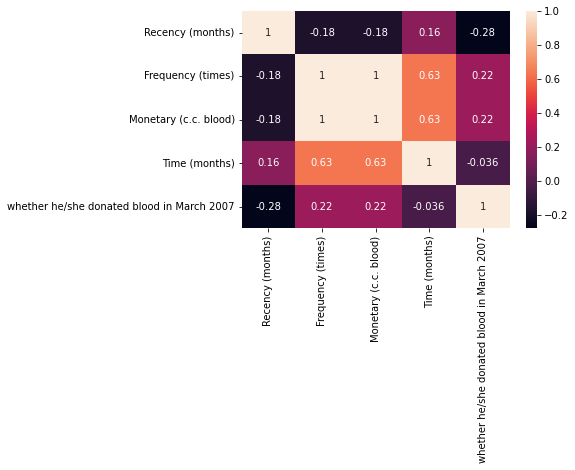

In [5]:
sns.heatmap(transfusion.corr(),annot=True)

In [6]:
x=transfusion.drop('whether he/she donated blood in March 2007',axis=1)

In [7]:
y=transfusion['whether he/she donated blood in March 2007']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini", min_samples_split=10,
    min_samples_leaf=10,random_state=50)

In [11]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=50)

In [12]:
y_pred=classifier.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
print("confusion_matrix")
print('------')
print(confusion_matrix(y_test,y_pred))

confusion_matrix
------
[[82  4]
 [19  8]]


In [15]:
print("classification_report")
print('------')
print(classification_report(y_test,y_pred))

classification_report
------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        86
           1       0.67      0.30      0.41        27

    accuracy                           0.80       113
   macro avg       0.74      0.62      0.64       113
weighted avg       0.78      0.80      0.77       113



In [16]:
print("accuracy score")
print('------')
print(accuracy_score(y_test,y_pred))

accuracy score
------
0.7964601769911505


In [17]:
from sklearn.tree import plot_tree

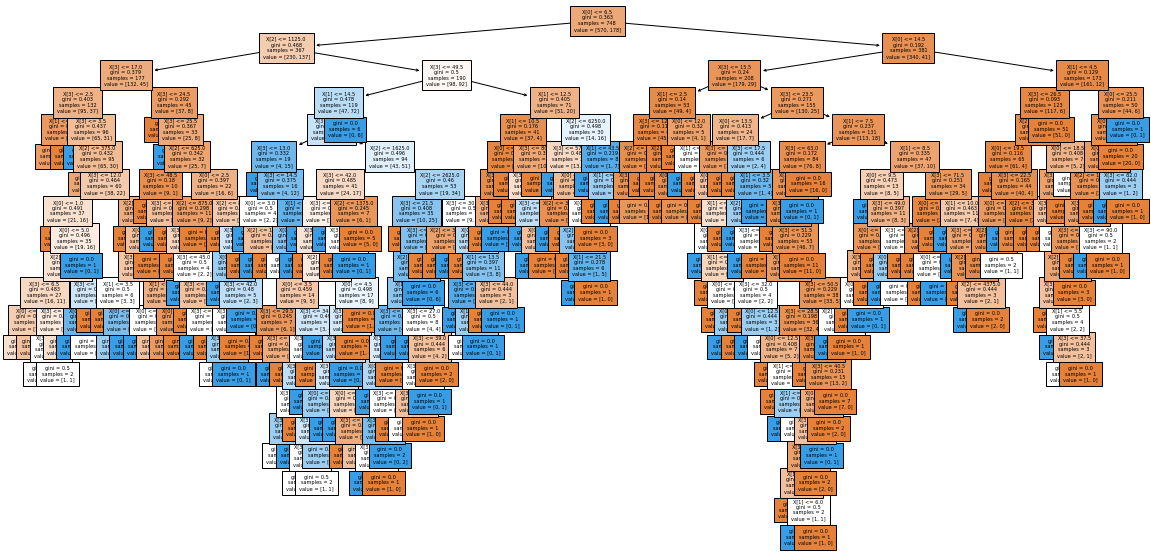

In [18]:
plt.figure(figsize=(20,10))
clf=DecisionTreeClassifier().fit(x,y)
plot_tree(clf,filled=True,fontsize=5)
plt.show()